## Exercise 1

### 1.1 How many fires were detected in total?

In [24]:
import pandas as pd

dataset_fires = pd.read_csv('../SpatialAnalysis2021/Data/non-spatial/fire/fire.csv')

nb_fires = dataset_fires.shape[0]

print(f'Number of detected fires: {nb_fires}')

Number of detected fires: 21460


### 1.2 During which time period were the fires detected?

In [25]:
detected_date = (dataset_fires.ACQ_DATE).unique()
print(detected_date)
print(f'Fires were detected between {detected_date[0]} and {detected_date[-1]}')

['2019-01-01' '2019-01-02' '2019-01-03' '2019-01-04' '2019-01-05'
 '2019-01-06' '2019-01-07' '2019-01-08' '2019-01-09' '2019-01-10'
 '2019-01-11' '2019-01-12' '2019-01-13' '2019-01-14' '2019-01-15'
 '2019-01-16' '2019-01-17' '2019-01-18' '2019-01-19' '2019-01-20'
 '2019-01-21' '2019-01-22' '2019-01-23' '2019-01-24' '2019-01-25'
 '2019-01-26' '2019-01-27' '2019-01-28' '2019-01-29' '2019-01-30'
 '2019-01-31']
Fires were detected between 2019-01-01 and 2019-01-31


### 1.3 Identify the ten brightest fires during this period. Where are they located?

In [37]:
import geopatra
import geopandas as gpd

bright = dataset_fires.sort_values('BRIGHTNESS', ascending=False).head(10)

gdf_brigth = gpd.GeoDataFrame(bright, geometry=gpd.points_from_xy(bright.LONGITUDE, bright.LATITUDE))

bright_plot = gdf_brigth.folium.plot()
bright_plot

In [6]:
bright.LATITUDE.unique()

array([ 9.676 , 10.5655,  8.1329,  7.6403, 12.446 ,  7.6324,  8.6089,
        9.6863, 11.3494, 10.0935])

In [7]:
bright.LONGITUDE.unique()

array([10.613 ,  6.7566, 11.187 ,  8.1262,  5.7779,  8.3984, 10.527 ,
       10.6208, 13.5145,  3.8743])

### 1.4 Extract all fires detected with a confidence higher than 70 percent. How much are these? Show in a plot

In [8]:
confid_fires = dataset_fires[dataset_fires['CONFIDENCE'] > 70]
confid_fires

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE
5,5.5644,5.7226,307.7,2.6,1.5,2019-01-01,144,Aqua,MODIS,72,6.03,292.5,31.6,N,2
7,12.2363,14.4138,331.5,1.2,1.1,2019-01-01,929,Terra,MODIS,81,6.03,305.9,26.4,D,0
8,12.2348,14.4245,326.7,1.2,1.1,2019-01-01,929,Terra,MODIS,75,6.03,306.0,18.9,D,0
10,12.2743,14.3043,324.3,1.2,1.1,2019-01-01,929,Terra,MODIS,71,6.03,305.2,16.2,D,0
11,12.2660,14.2921,367.3,1.2,1.1,2019-01-01,929,Terra,MODIS,100,6.03,305.5,124.4,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21450,11.4083,5.7974,307.7,1.2,1.1,2019-01-31,2210,Terra,MODIS,72,6.03,291.9,10.1,N,0
21452,10.8918,5.7326,309.5,1.1,1.1,2019-01-31,2210,Terra,MODIS,77,6.03,293.7,10.5,N,0
21454,10.9928,4.8431,308.2,1.0,1.0,2019-01-31,2210,Terra,MODIS,74,6.03,294.2,7.9,N,0
21457,11.4788,6.7811,343.6,1.3,1.1,2019-01-31,2210,Terra,MODIS,100,6.03,295.2,71.5,N,0


In [9]:
print(f'Number of detected fires with confidence higher than 70: {confid_fires.shape[0]}')

Number of detected fires with confidence higher than 70: 7285


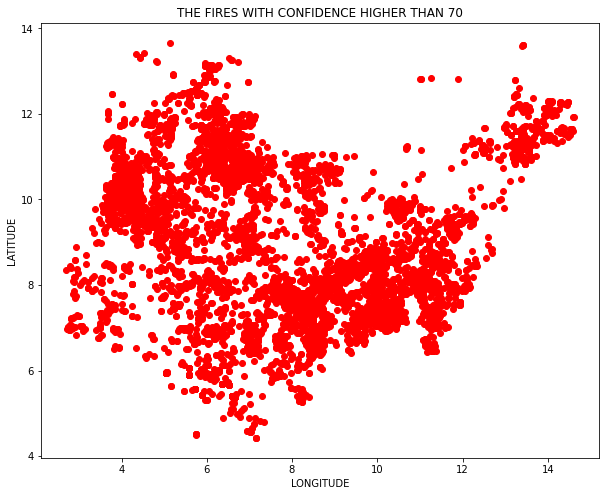

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))


gdf_confid_fires = gpd.GeoDataFrame(confid_fires, geometry=gpd.points_from_xy(confid_fires.LONGITUDE, confid_fires.LATITUDE))

gdf_confid_fires_plot = gdf_confid_fires.folium.plot()
bright_plot

#plt.scatter(dataset_fires.LONGITUDE, dataset_fires.LATITUDE, color='gray')
plt.scatter(confid_fires.LONGITUDE, confid_fires.LATITUDE, color='red')
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.title("THE FIRES WITH CONFIDENCE HIGHER THAN 70")
plt.show()

### 1.5 Create a histogram showing the distribution of the fire radiative power. Cleary indicate the description of the y-axis and x-axis.

[Text(0.5, 0, 'Fire Radiative Power (FRP)'), Text(0, 0.5, 'Number of fires')]

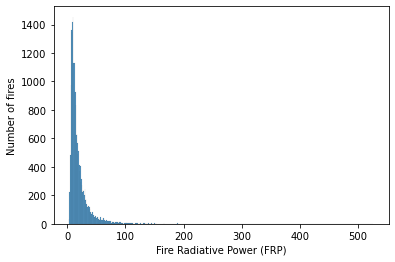

In [31]:
import seaborn as sns

ax = sns.histplot(dataset_fires['FRP'])
ax.set(xlabel='Fire Radiative Power (FRP)', ylabel='Number of fires')

### 1.6 Create a plot showing the numbers of fires for each day. Convert the dataset into a spatial geopandas dataframe.

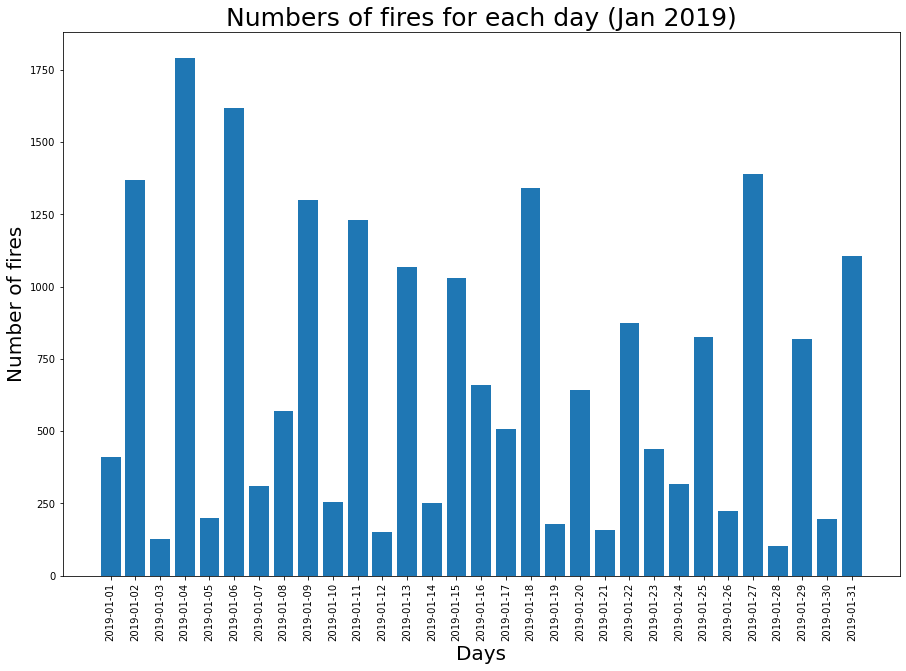

In [32]:
day_x = (dataset_fires.ACQ_DATE).unique()#days
#number of occurence of each day
y = []
for i in range(0, 31):
    y.append((list(dataset_fires.ACQ_DATE)).count(day_x[i]))
#plotting
plt.figure(figsize=(15, 10))
plt.bar(day_x, y)
plt.xticks(rotation=90)
plt.title("Numbers of fires for each day (Jan 2019)", fontsize=25)
plt.xlabel("Days", fontsize=20)
plt.ylabel("Number of fires", fontsize=20)
plt.show()

In [33]:
dataset_fires_gdf = gpd.GeoDataFrame(dataset_fires, geometry=gpd.points_from_xy(dataset_fires.LONGITUDE, dataset_fires.LATITUDE))

### 1.7 Create a heat map showing the density of fires in Nigeria.

In [34]:
import numpy as np
import folium
from folium.plugins import HeatMap

In [58]:
lat = np.array(dataset_fires['LATITUDE'])
lon = np.array(dataset_fires['LONGITUDE'])
#js = np.array(dataset_fires['BRIGHTNESS'], dtype=float)

js = np.array(y, dtype=float)
folium.Figure(width=1200, height=1200)
#data1 = [[lat[i], lon[i], js[i]] for i in range (21460)]
data1 = [[lat[i].mean(), lon[i].mean(), js[i]] for i in range (491)]

map_fire = folium.Map(location=[lon.max(), lat.max()], zoom_start=10, tiles='Stamen Terrain', control_scale=True)

(HeatMap(data1).add_to(map_fire)).show
map_fire

monthly Fire Density (FD) was calculated by dividing the number of fires in the area by the surface (km2) of the vegetation and region considered.

### 1.8 Investigate if the fires detected in Nigeria are distributed rather regular or if the fires appear rather clustered (if so try to identify the main clusters and explain). Import the local area government dataset (nigeria_lga.shp)

First, to get sense of what the spatial dimension of the dataset looks like is to plot it. 
At its most basic level, we can generate a scatter plot with seaborn, and provide additional context by overlaying a tile map from the internet, using contextily with jointplot.

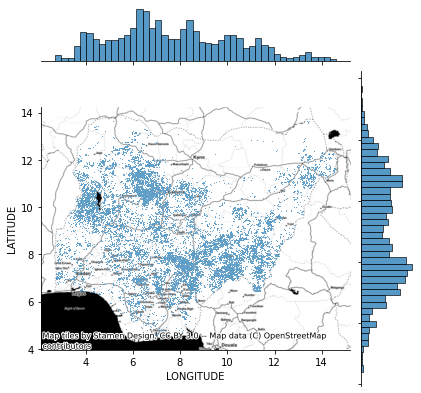

In [38]:
import contextily

joint_axes = sns.jointplot(x='LONGITUDE', y='LATITUDE', data=dataset_fires, s=1)

contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.Stamen.Toner
)

We can see that dots tend to be concentrated in the center of the covered area. Furthermore, whitin the broad pattern, we can see there seems to **be more localised clusters**. 

Despite there are localised clusters, there are areas where the density of points is so large that plotting opaque dots on top of one another. We can recast this approach as a spatial histogram using **Kernel Density Estimation** so that we can **identify the main clusters (KDE)**. KDE is an empirical approximation of the probability density function. It lays a grid of points over the space of interest on which it places kernel functions that count points around them with different weight based on the distance. These counts are then aggregated to generate a global surface with probability.
From main clusters to less important ones, colors go from violet, then green up to yellow.

/home/mrpinformcc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


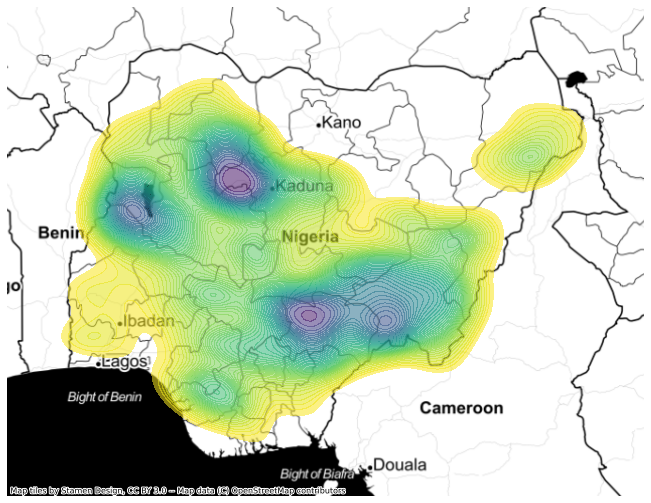

In [39]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
sns.kdeplot(
    dataset_fires['LONGITUDE'], 
    dataset_fires['LATITUDE'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.Stamen.Toner, crs='EPSG:4326'
)
# Remove axes
ax.set_axis_off()


In [40]:
nigeria_lga_gpdf = gpd.read_file('../SpatialAnalysis2021/Data/vector/fires/new_lga_nigeria_2003.shp')

### 1.9 Count the fires occurring in the different local government areas in Nigeria. How much are they?

In [41]:
import numpy as np

link = gpd.sjoin(nigeria_lga_gpdf.to_crs('EPSG:4326'),dataset_fires_gdf)
y = link['LGA'].value_counts(ascending=True)


<ipython-input-41-cdf294b9f857>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  link = gpd.sjoin(nigeria_lga_gpdf.to_crs('EPSG:4326'),dataset_fires_gdf)


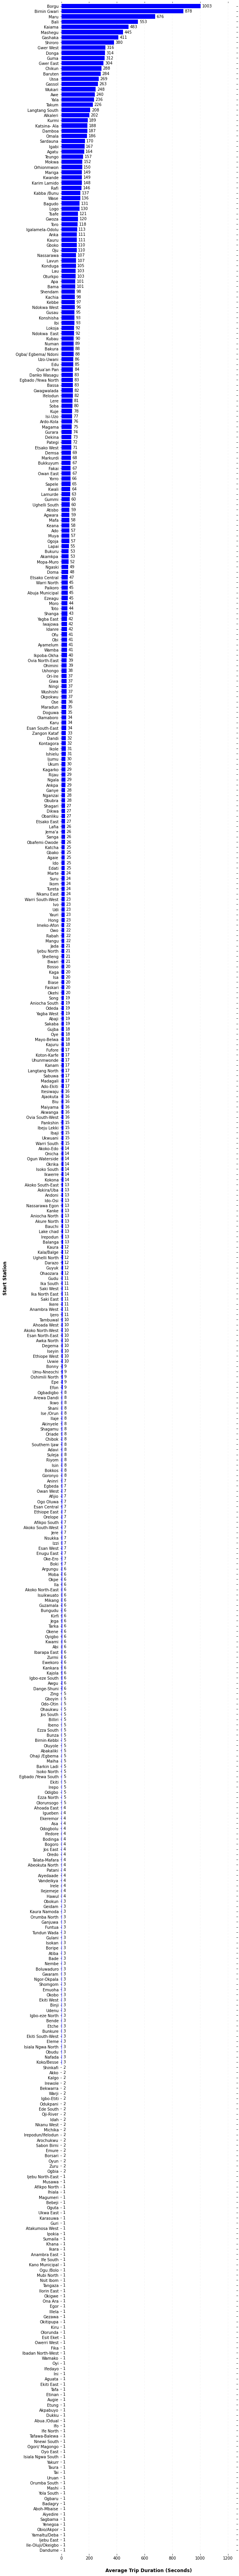

In [20]:
ax = y.plot(kind='barh', figsize=(8, 120), color='blue', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Fires occurring", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("different local government areas", labelpad=20, weight='bold', size=12)
for i, v in enumerate(y):
    ax.text(v + 10, i, str(v), color='black', fontsize=10, ha='left', va='center')

### 1.10 Create a map displaying the number of fires for each local government area.

In [22]:
lga_index = nigeria_lga_gpdf.set_index('LGA')
lga_count  = link.groupby(by='LGA')[["LGA"]].count()
lga_count.rename(columns={'LGA':'nb_fires'},inplace=True)

lga_merge = lga_index.merge(lga_count,how='left', left_index=True, right_index=True)
lga_merge = lga_merge.fillna(0.0)

<AxesSubplot:>

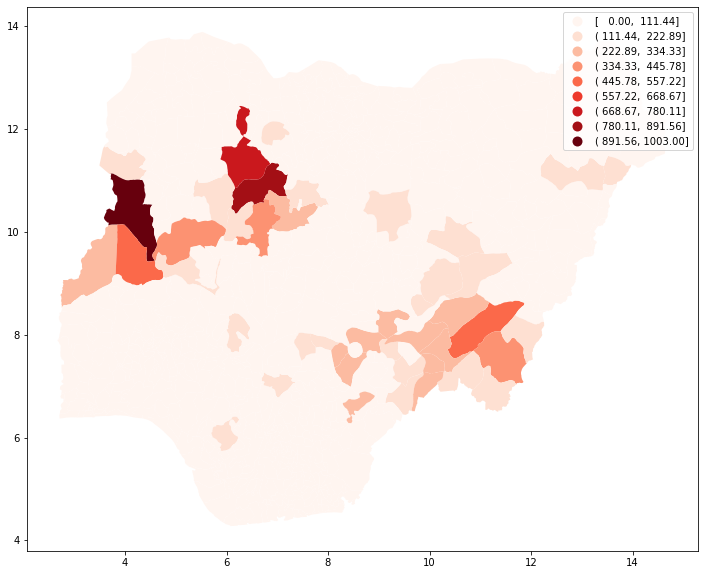

In [23]:
lga_merge.plot(column='nb_fires', cmap='Reds', figsize=(16, 10), scheme='equal_interval', k=9, legend=True)

### 1.11 Investigate the spatial correlation between the numbers of fires in the different local government areas.

In [24]:
import esda
from geopandas import GeoDataFrame
import libpysal as lps
from shapely.geometry import Point
%matplotlib inline

In [25]:
lga_merge.to_file('../Workspace/fires_by_lga.shp')
fires_by_lga = gpd.read_file('../Workspace/fires_by_lga.shp')

In [26]:
#median computation (grouped by lga)
median_fires_by_lga = fires_by_lga['nb_fires'].groupby([fires_by_lga['LGA']]).mean()
median_fires_by_lga

LGA
Aba North        0.0
Aba South        0.0
Abadam           0.0
Abaji           19.0
Abak             0.0
                ... 
Zangon Kataf    33.0
Zaria            0.0
Zing             5.0
Zurmi            6.0
Zuru             2.0
Name: nb_fires, Length: 769, dtype: float64

In [27]:
nigeria_median_fires_by_lga = nigeria_lga_gpdf.join(median_fires_by_lga, on='LGA')
nigeria_median_fires_by_lga.rename(columns={'nb_fires': 'median_nb_fires'}, inplace=True)
#nigeria_median_fires_by_lga.head(15)

<AxesSubplot:>

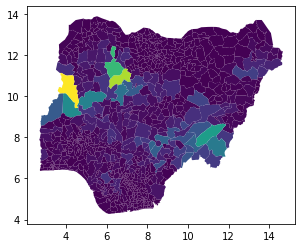

In [29]:
nigeria_median_fires_by_lga.plot(column='median_nb_fires')

<AxesSubplot:>

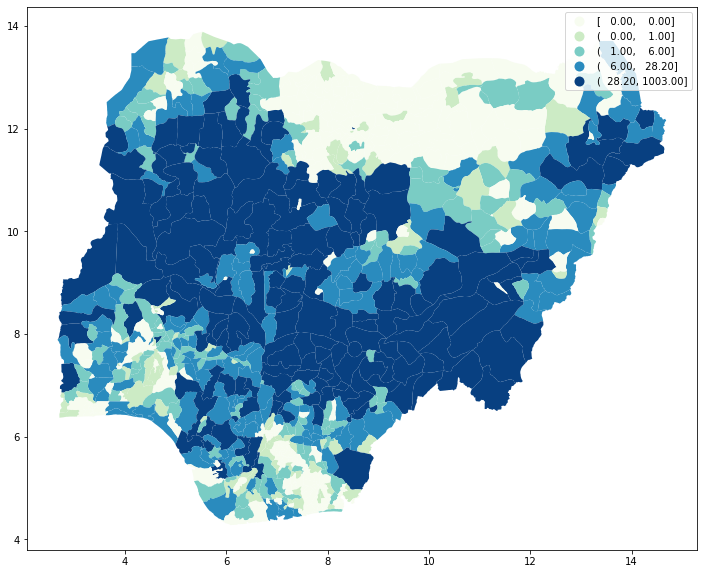

In [30]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
nigeria_median_fires_by_lga.plot(column='median_nb_fires', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)

In [31]:
df = nigeria_median_fires_by_lga
wq = lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [32]:
y = df['median_nb_fires']
ylag = lps.weights.lag_spatial(wq, y)

In [33]:
#ylag

In [34]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

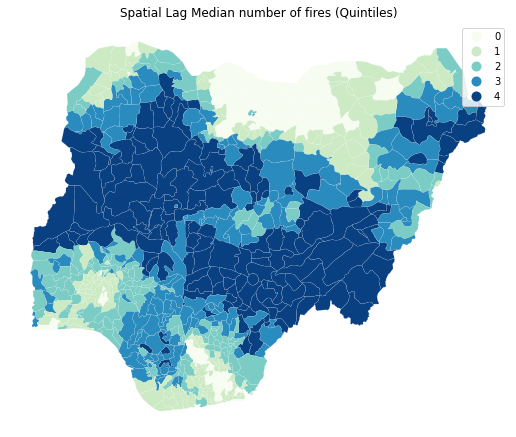

In [35]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median number of fires (Quintiles)")

plt.show()

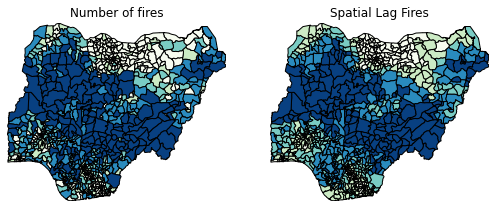

In [36]:
df['lag_median_nb_fires'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='median_nb_fires', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Number of fires")
df.plot(column='lag_median_nb_fires', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Fires")
ax[0].axis('off')
ax[1].axis('off')
plt.show()


In [37]:
y.median()

3.0

In [38]:
yb = y > y.median()
sum(yb)

370

In [39]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
df['yb'] = yb

<AxesSubplot:>

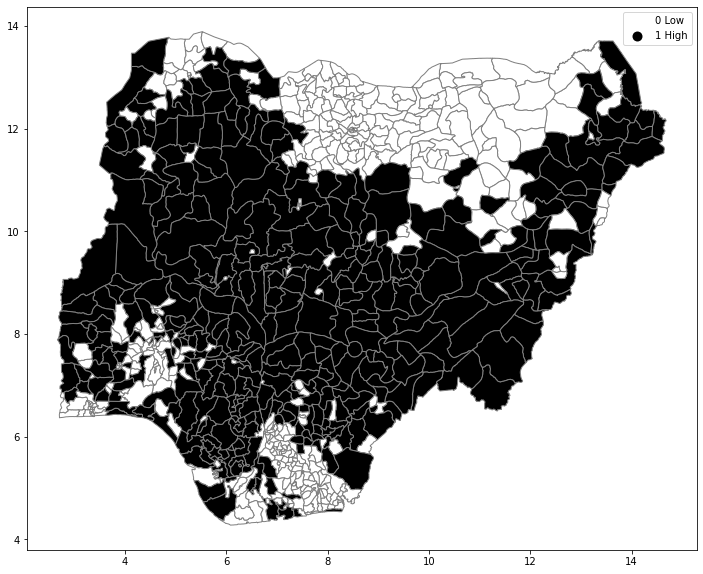

In [40]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [41]:
np.random.seed(12345)
import esda

In [42]:
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
jc = esda.join_counts.Join_Counts(yb, wq)

In [43]:
jc.sim_bb = jc.sim_bb.astype('float64')

Text(0.5, 0, 'BB Counts')

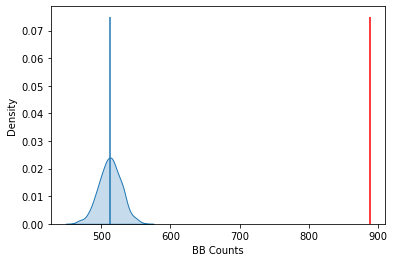

In [44]:
sns.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [45]:
wq.transform = 'r'
y = df['median_nb_fires']

In [46]:
from esda.moran import Moran
moran = Moran(y, wq)
moran.I

0.4340743046988598

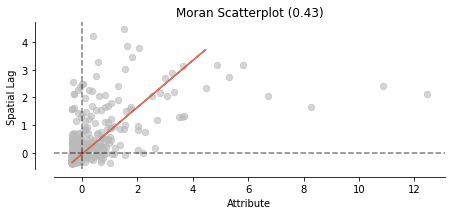

In [47]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

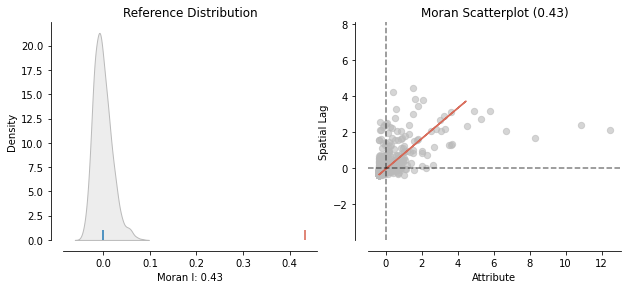

In [48]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

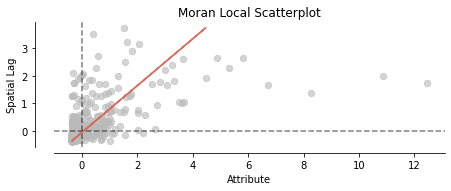

In [49]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc)
ax.set_ylabel('Spatial Lag')
plt.show()

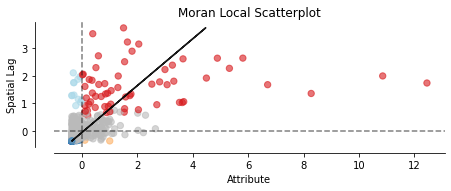

In [50]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_ylabel('Spatial Lag')
plt.show()


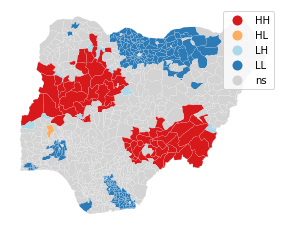

In [51]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, nigeria_lga_gpdf, p=0.05)
plt.show()

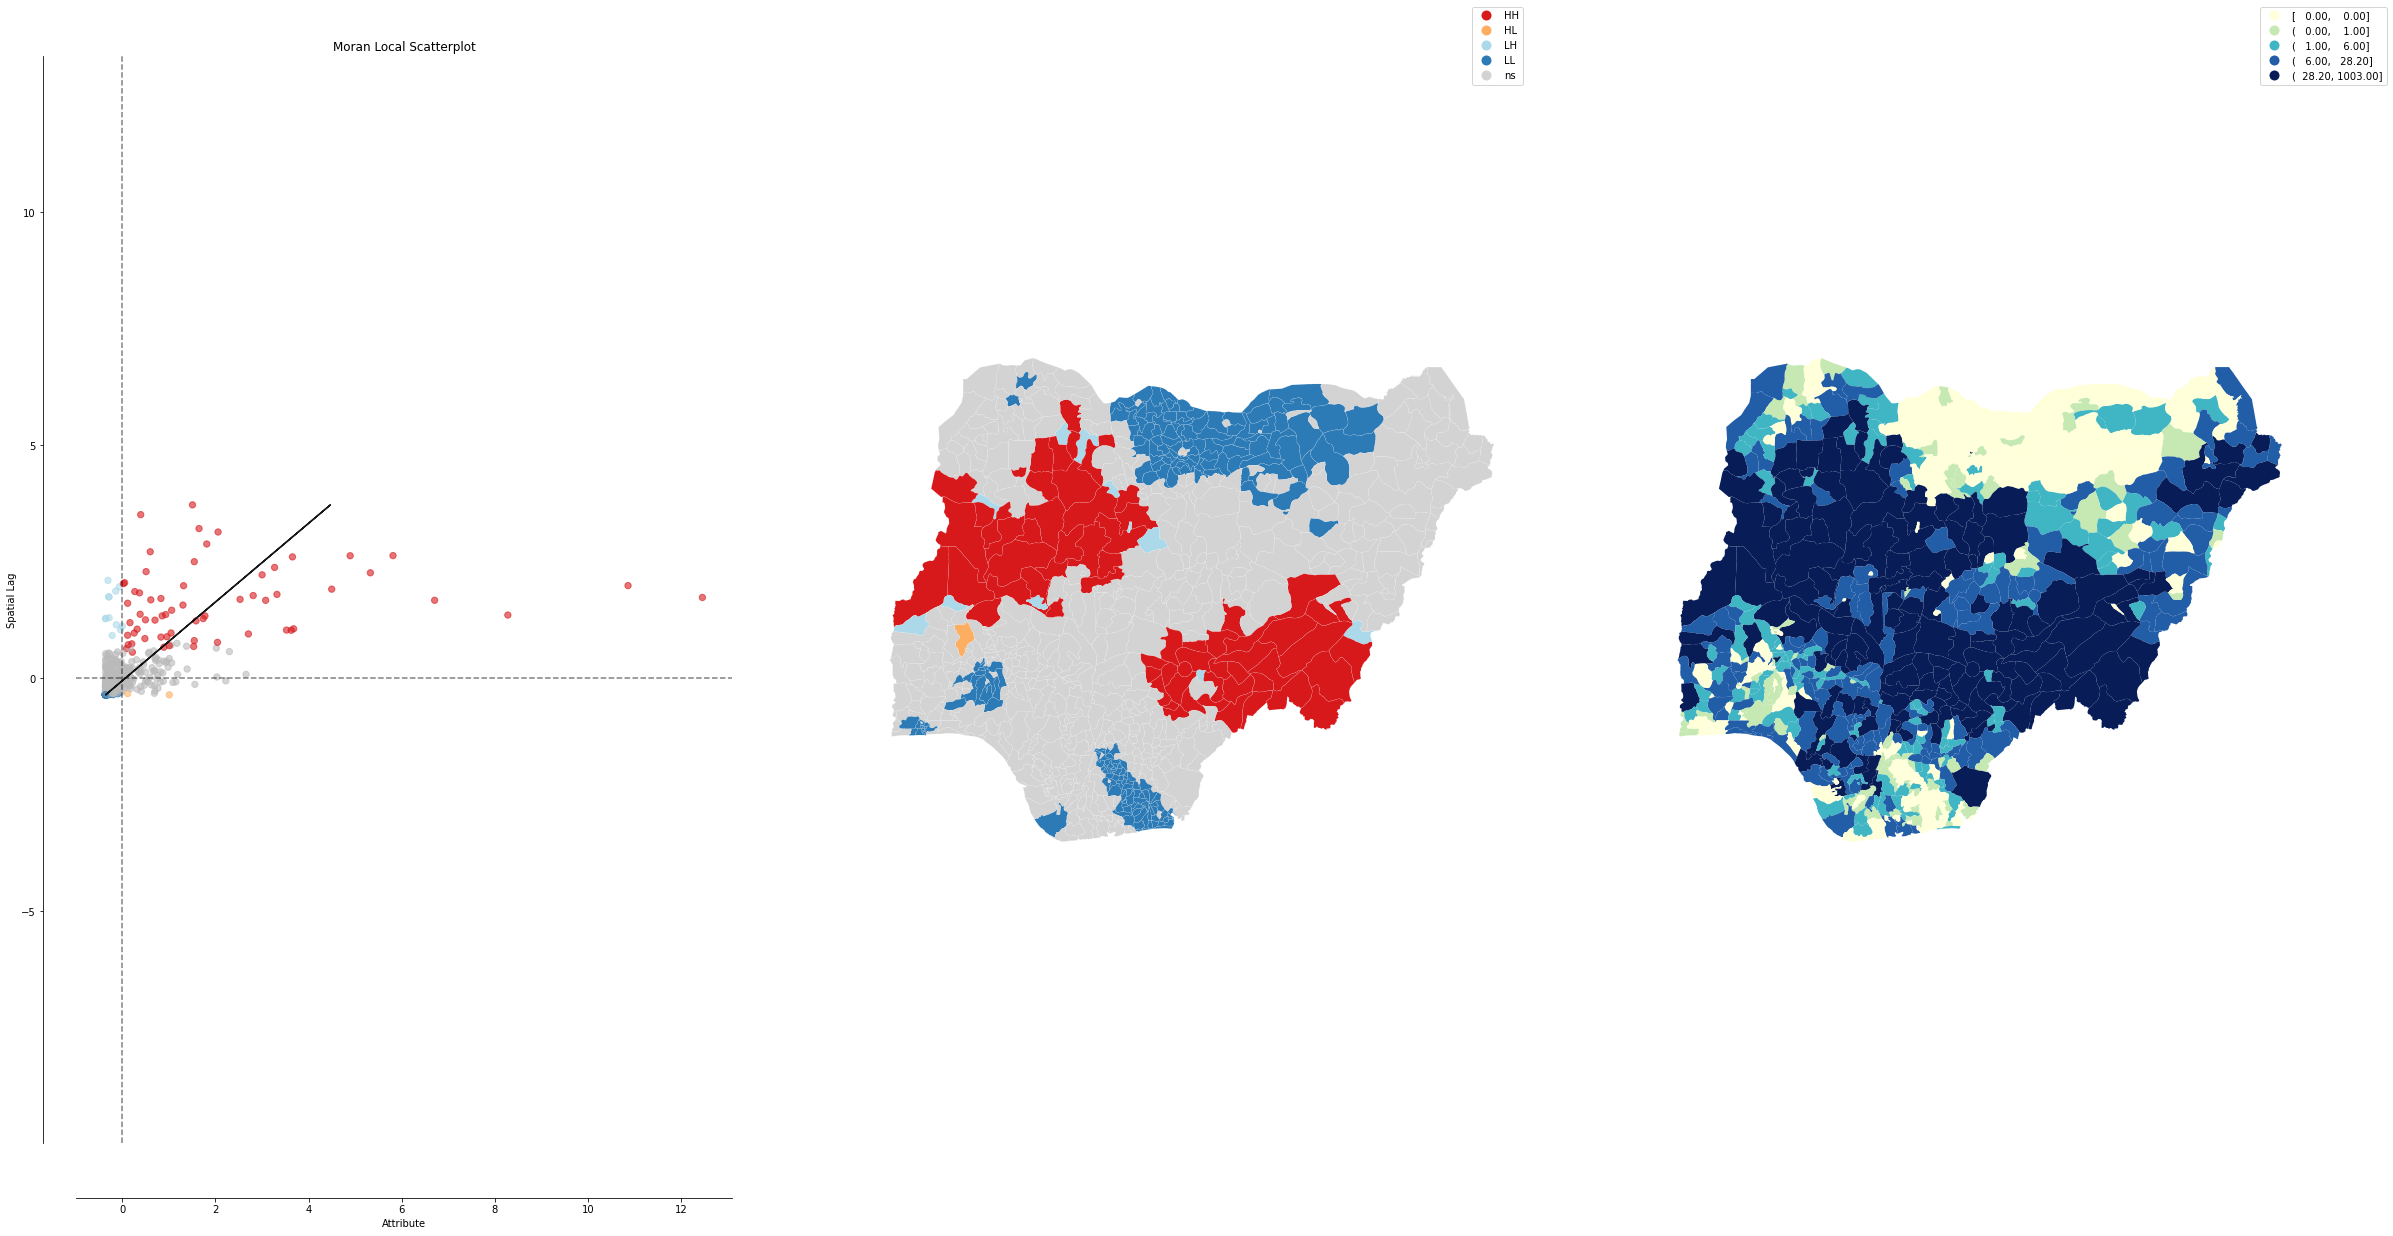

In [52]:
from splot.esda import plot_local_autocorrelation

plot_local_autocorrelation(moran_loc, nigeria_median_fires_by_lga, 'median_nb_fires', figsize=(40,20))
plt.show()

## Exercice 2

### Import the elevation dataset for Burkina Faso (bfa_elevation.shp)

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

bfa_elevation_gpdf = gpd.read_file('../project/bfa_elevation.shp')

bfa_elevation_gpdf

,SRTM30mBur,geometry
0,319.36816,POINT (637856.691 1221376.734)
1,313.01996,POINT (750252.803 1441598.141)
2,301.22635,POINT (516264.424 1491162.259)
3,354.02655,POINT (370630.477 1416961.834)
4,302.03482,POINT (472288.982 1092949.930)
...,...,...
995,301.13989,POINT (626802.874 1439588.021)
996,292.15002,POINT (699721.231 1377245.138)
997,430.76132,POINT (280631.733 1236513.922)
998,312.56842,POINT (800966.112 1329742.539)


<AxesSubplot:>

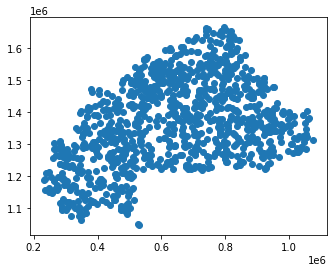

In [3]:
bfa_elevation_gpdf.plot()

### 2.1 Choose a spatial interpolation (deterministic or stochastic spatial interpolation technique) method and create a continuous elevation raster in a spatial resolution (cell size) of 20 m. Explain why you decided for a certain spatial interpolation technique. Import the SRTM for Burkina Faso compare it to your results (bfa_srtm.tif).

<AxesSubplot:>

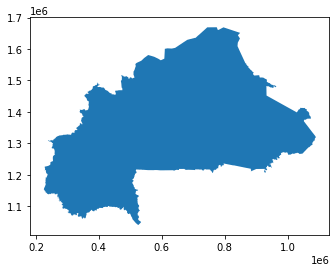

In [3]:
region_BF = gpd.read_file('/home/mrpinformcc/Documents/Limite BF.shp')
region_BF.plot()

##### Non Deterministic methods

##### --Kriging

In [4]:
import numpy as np
import pandas as pd
import glob
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt
from pykrige.kriging_tools import write_asc_grid
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Path, PathPatch

In [5]:
xmin = bfa_elevation_gpdf.geometry.x.min()
ymin = bfa_elevation_gpdf.geometry.y.min()
xmax = bfa_elevation_gpdf.geometry.x.max()
ymax = bfa_elevation_gpdf.geometry.y.max()

In [6]:
grid_lon = np.linspace(xmin, xmax, 100)
grid_lat = np.linspace(ymin, ymax, 100)

In [7]:

bfa_elevation_gpdf['x'] = bfa_elevation_gpdf['geometry'].x
bfa_elevation_gpdf['y'] = bfa_elevation_gpdf['geometry'].y
bfa_elevation_gpdf

,SRTM30mBur,geometry,x,y
0,319.36816,POINT (637856.691 1221376.734),637856.691287,1.221377e+06
1,313.01996,POINT (750252.803 1441598.141),750252.802803,1.441598e+06
2,301.22635,POINT (516264.424 1491162.259),516264.424417,1.491162e+06
3,354.02655,POINT (370630.477 1416961.834),370630.476934,1.416962e+06
4,302.03482,POINT (472288.982 1092949.930),472288.981886,1.092950e+06
...,...,...,...,...
995,301.13989,POINT (626802.874 1439588.021),626802.874396,1.439588e+06
996,292.15002,POINT (699721.231 1377245.138),699721.230635,1.377245e+06
997,430.76132,POINT (280631.733 1236513.922),280631.733391,1.236514e+06
998,312.56842,POINT (800966.112 1329742.539),800966.112486,1.329743e+06


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 0.009926049250352011
Nugget: 0.004315681047255765 



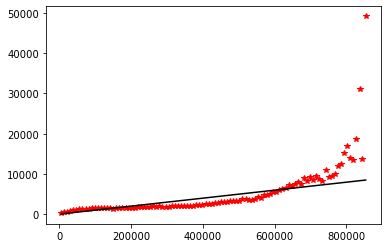

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...

[[290.5075471307087 284.4124509785083 278.39064028128274 ...
  169.72384790161135 170.2424497405242 170.82314274099406]
 [293.0550067441876 286.8614702106594 280.7824985446877 ...
  169.6776773779654 170.2469274331009 170.87890713456932]
 [295.7619874418736 289.48148490587926 283.3808672894619 ...
  169.6407721330795 170.2642669063007 170.9509291487975]
 ...
 [410.050848021982 408.11228610017963 406.02814365011767 ...
  247.65745290001112 247.36439017974092 247.07906761504108]
 [408.59230612587925 406.62003854315645 404.5060207726238 ...
  247.53569855217052 247.25371053047638 246.97778607544524]
 [407.1615442829528 405.15994731216824 403.02057564822803 ...
  247.41888600397607 247.14776153759377 246.88114462326365]]


In [8]:
#linear because of the contunous distributrion of point
OK = OrdinaryKriging(bfa_elevation_gpdf.x, bfa_elevation_gpdf.y, bfa_elevation_gpdf.SRTM30mBur, variogram_model='linear',verbose=True, enable_plotting=True, nlags=100)
z, ss = OK.execute('grid', grid_lon, grid_lat)
print(z)

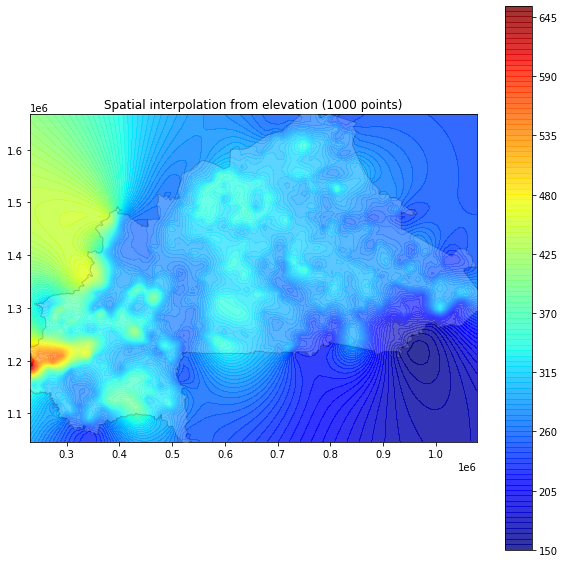

In [11]:
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat) 

fig, ax = plt.subplots(figsize=(10,10))

contour = plt.contourf(xintrp, yintrp, z,len(z),cmap=plt.cm.jet,alpha = 0.8) 
plt.colorbar(contour)

region_BF.plot(ax=ax, color='white', alpha = 0.2, edgecolor='black', zorder = 5)
npts = len(bfa_elevation_gpdf.x)


plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.xticks()
plt.yticks()


plt.title('Spatial interpolation from elevation (%d points)' % npts)
plt.show()


#### Raster creation

In [12]:
#z.data
#interpolation input 
#xintrp, yintrp
#resolution
rRes = 20
#definition of the raster transformation array
from rasterio.transform import Affine
transform = Affine.translation(xintrp[0][0] -rRes/2, yintrp[0][0] -rRes/2)*Affine.scale(rRes,rRes)
transform

Affine(20.0, 0.0, 230966.40281275153,
       0.0, 20.0, 1046709.9229832509)

In [13]:
#get crs as wkt
from rasterio.crs import CRS
rasterCrs = CRS.from_epsg(32630)
rasterCrs.data

{'init': 'epsg:32630'}

In [14]:
#definition, register and close of interpolated raster
import rasterio
interpRaster = rasterio.open('../Workspace/interpRaster.tif',
                             'w',
                             driver='GTiff',
                             height=1000,
                             width=1500,
                             count=1,
                             dtype=z.dtype,
                             crs=rasterCrs,
                             transform=transform,
                            )

interpRaster.write(z, 1)
interpRaster.close()

#### DEM importation

In [15]:
import rasterio

bfa_srtm = rasterio.open('../project/bfa_srtm-002.tif')

In [16]:
def displayInfo(raster):
    # what is the name of this image
    img_name = raster.name
    print('Image filename: {n}'.format(n=img_name))

    # How many bands does this image have?
    num_bands = raster.count
    print('Number of bands in image: {n}'.format(n=num_bands))

    # How many rows and columns?
    rows, cols = raster.shape
    print('Image size is: {r} rows x {c} columns'.format(r=rows, c=cols))

    # Does the raster have a description or metadata?
    desc = raster.descriptions
    metadata = raster.meta

    print('Raster description: {desc}'.format(desc=desc))

    # What driver was used to open the raster?
    driver = raster.driver
    print('Raster driver: {d}'.format(d=driver))

    # What is the raster's projection?
    proj = raster.crs
    print('Image projection:')
    print(proj, '\n')

    # What is the raster's "geo-transform"
    gt = raster.transform

    print('Image geo-transform:\n{gt}\n'.format(gt=gt))

    print('All raster metadata:')
    print(metadata)
    print('\n')

In [17]:
displayInfo(bfa_srtm)

Image filename: ../project/bfa_srtm-002.tif
Number of bands in image: 1
Image size is: 20452 rows x 28526 columns
Raster description: (None,)
Raster driver: GTiff
Image projection:
EPSG:4326 

Image geo-transform:
| 0.00, 0.00,-5.52|
| 0.00,-0.00, 15.08|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 28526, 'height': 20452, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00027777777778167283, 0.0, -5.51875,
       0.0, -0.00027777777777234506, 15.082361111)}




### 2.2 Show maps for both rasters and compare your created continuous elevation raster with the SRTM Digital Elevation Model for Burkina Faso. What do you observe? Where are the differences?

In [18]:
original_data = rasterio.open('../project/bfa_srtm-002.tif').read(1)[1:-1,1:-1]

In [22]:
estimated_data = rasterio.open('../Workspace/interpRaster.tif').read(1)[1:-1,1:-1]
estimated_data = estimated_data[::-1,:]

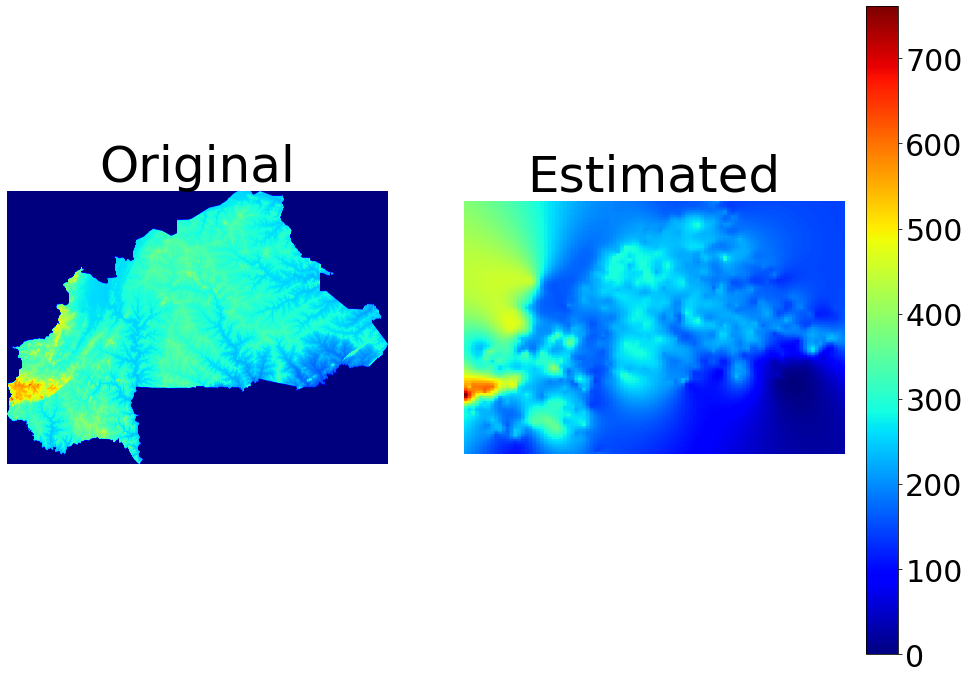

In [23]:
fig = plt.figure(figsize=(15,15))
plt.subplot(121)
im = plt.imshow(original_data,cmap=plt.cm.jet)
plt.axis('off')
plt.title('Original',fontsize=50)
cb_ax = fig.add_axes([0.92, 0.2, 0.03, 0.6])
cb = fig.colorbar(im, cax=cb_ax)
cb.ax.tick_params(labelsize=30)
plt.subplot(122)
im = plt.imshow(estimated_data,cmap=plt.cm.jet)
plt.axis('off')
plt.title('Estimated',fontsize=50)
plt.show()